In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [3]:
# Assuming the JSON data is in a file called 'data.json'
with open('../results/scenario_3/clean_all_results_shallow_models.json', 'r') as f:
    data = json.load(f)

rows = []

# Iterate over the JSON data and append the values to the 'rows' list
for key, values in data.items():
    for value in values:
        row = value.copy()
        row['file_key'] = key
        rows.append(row)

# Create a dataframe from the 'rows' list
df = pd.DataFrame(rows)


In [4]:
def stringify_list(x):
    if isinstance(x, list):
        return ','.join(map(str, x))
    return None

# Convert the list to a string
df['aggregate'] = df['aggregate'].apply(stringify_list)

# Convert the 'aggregate' column into a category
df['aggregate'] = df['aggregate'].astype('category')


# Normalize the dictionaries in the 'hyperparameters' column
expanded_hyperparameters = pd.json_normalize(df['hyperparameters'])

# Concatenate the original dataframe with the expanded hyperparameters dataframe
result_df = pd.concat([df.drop('hyperparameters', axis=1), expanded_hyperparameters], axis=1)



result_df.head()

,model,aggregate,average_rmse_arousal,average_rmse_valence,file_key,n_estimators,max_depth,min_samples_split
0,RandomForestRegressor,min,1.907745,0.936966,3,50,10.0,5.0
1,RandomForestRegressor,min,1.915884,0.956229,3,50,10.0,2.0
2,RandomForestRegressor,min,1.909039,0.941567,3,50,NaN,5.0
3,RandomForestRegressor,min,1.909192,0.948431,3,50,NaN,2.0
4,RandomForestRegressor,min,1.908924,0.939349,3,100,10.0,5.0


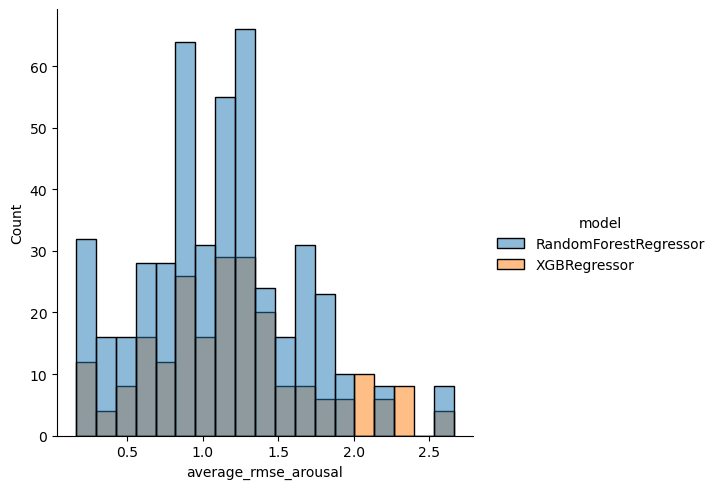

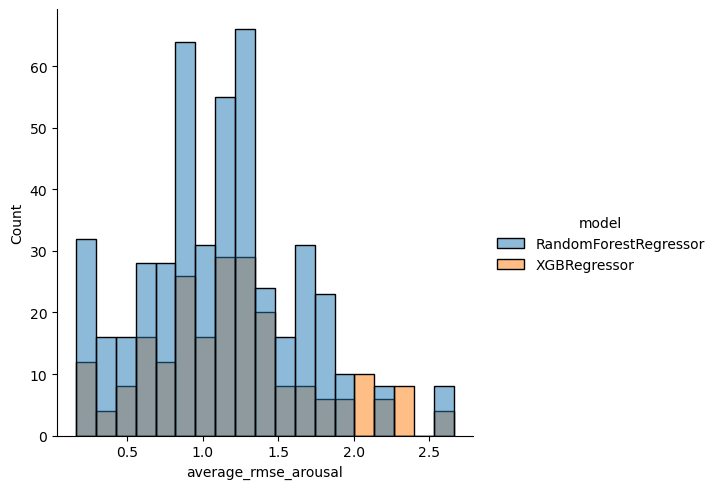

In [5]:
sns.displot(result_df, x="average_rmse_arousal", hue="model",fill=True)
sns.displot(result_df, x="average_rmse_arousal", hue="model",fill=True)
plt.show()


In [15]:
# Group by hyperparameters and calculate aggregated statistics
model_df = result_df.groupby('model').describe()

# Display the sorted DataFrames
display(model_df)

average_rmse_arousal                                \
                                     count      mean       std       min   
model                                                                      
RandomForestRegressor                456.0  1.108050  0.509298  0.161119   
XGBRegressor                         228.0  1.204122  0.558383  0.169191   

                                                               \
                            25%       50%       75%       max   
model                                                           
RandomForestRegressor  0.782420  1.099931  1.370598  2.664241   
XGBRegressor           0.842299  1.153520  1.446450  2.610740   

                      average_rmse_valence            ... max_depth        \
                                     count      mean  ...       75%   max   
model                                                 ...                   
RandomForestRegressor                456.0  1.353755  ...      10.0  10.0   
XGBRegressor                         228.0  1.403913  ...      10.0  10.0   

                      min_samples_split                                     \
                                  count mean       std  min  25%  50%  75%   
model                                                                        
RandomForestRegressor             456.0  3.5  1.501647  2.0  2.0  3.5  5.0   
XGBRegressor                        0.0  NaN       NaN  NaN  NaN  NaN  NaN   

                            
                       max  
model                       
RandomForestRegressor  5.0  
XGBRegressor           NaN  

[2 rows x 40 columns]

In [22]:
df.query("model == 'RandomForestRegressor'")

,model,hyperparameters,aggregate,average_rmse_arousal,average_rmse_valence,file_key
0,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 10, 'min_sam...",min,1.907745,0.936966,3
1,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': 10, 'min_sam...",min,1.915884,0.956229,3
2,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': None, 'min_s...",min,1.909039,0.941567,3
3,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': None, 'min_s...",min,1.909192,0.948431,3
4,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 10, 'min_sa...",min,1.908924,0.939349,3
...,...,...,...,...,...,...
675,RandomForestRegressor,"{'n_estimators': 50, 'max_depth': None, 'min_s...",min,1.214481,0.518264,41
676,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 10, 'min_sa...",min,1.214410,0.519052,41
677,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': 10, 'min_sa...",min,1.210363,0.520912,41
678,RandomForestRegressor,"{'n_estimators': 100, 'max_depth': None, 'min_...",min,1.215565,0.519497,41


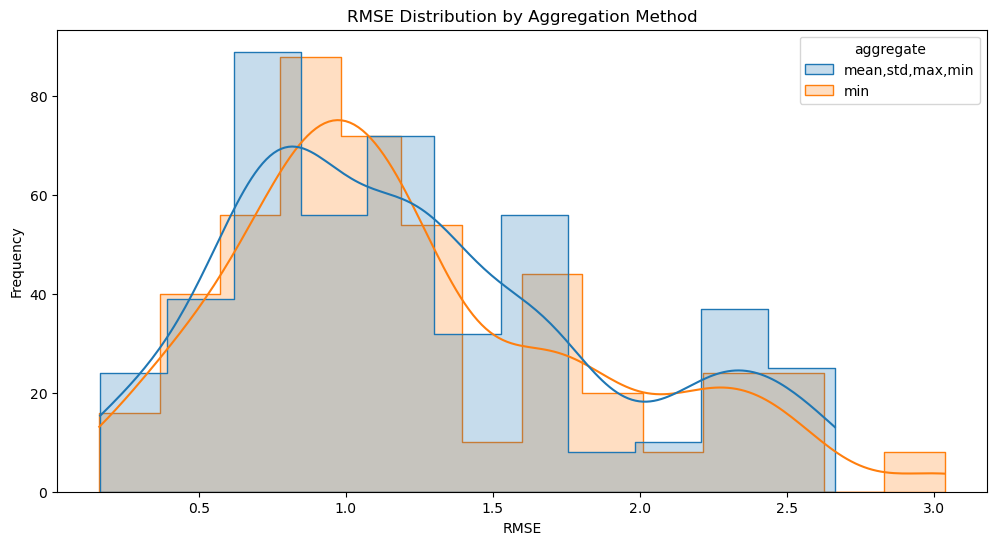

In [23]:
# Create a new DataFrame with the 'aggregate' column and the average RMSE columns
df_rmse = df.query("model == 'RandomForestRegressor'")[['aggregate','average_rmse_arousal', 'average_rmse_valence']]

# Melt the DataFrame to have one row per RMSE value, including a new column 'type' to identify the RMSE type
df_rmse = df_rmse.melt(id_vars=['aggregate'], var_name='type', value_name='rmse')

# Create a histogram for the RMSE distribution for each aggregation method
plt.figure(figsize=(12, 6))
sns.histplot(data=df_rmse, x='rmse', hue='aggregate', kde=True, common_bins=False, element='step')

# Set the title and labels
plt.title('RMSE Distribution by Aggregation Method')
plt.xlabel('RMSE')
plt.ylabel('Frequency')

# Show the plot
plt.show()


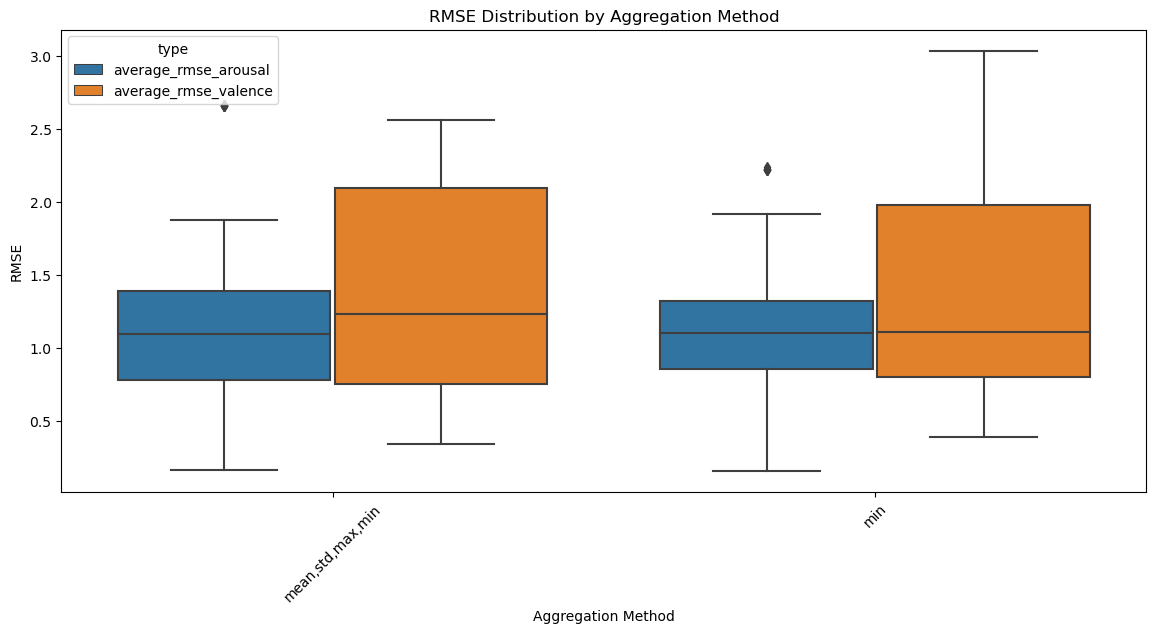

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for the RMSE distribution for each aggregation method
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_rmse, x='aggregate', y='rmse', hue='type')

# Set the title and labels
plt.title('RMSE Distribution by Aggregation Method')
plt.xlabel('Aggregation Method')
plt.ylabel('RMSE')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


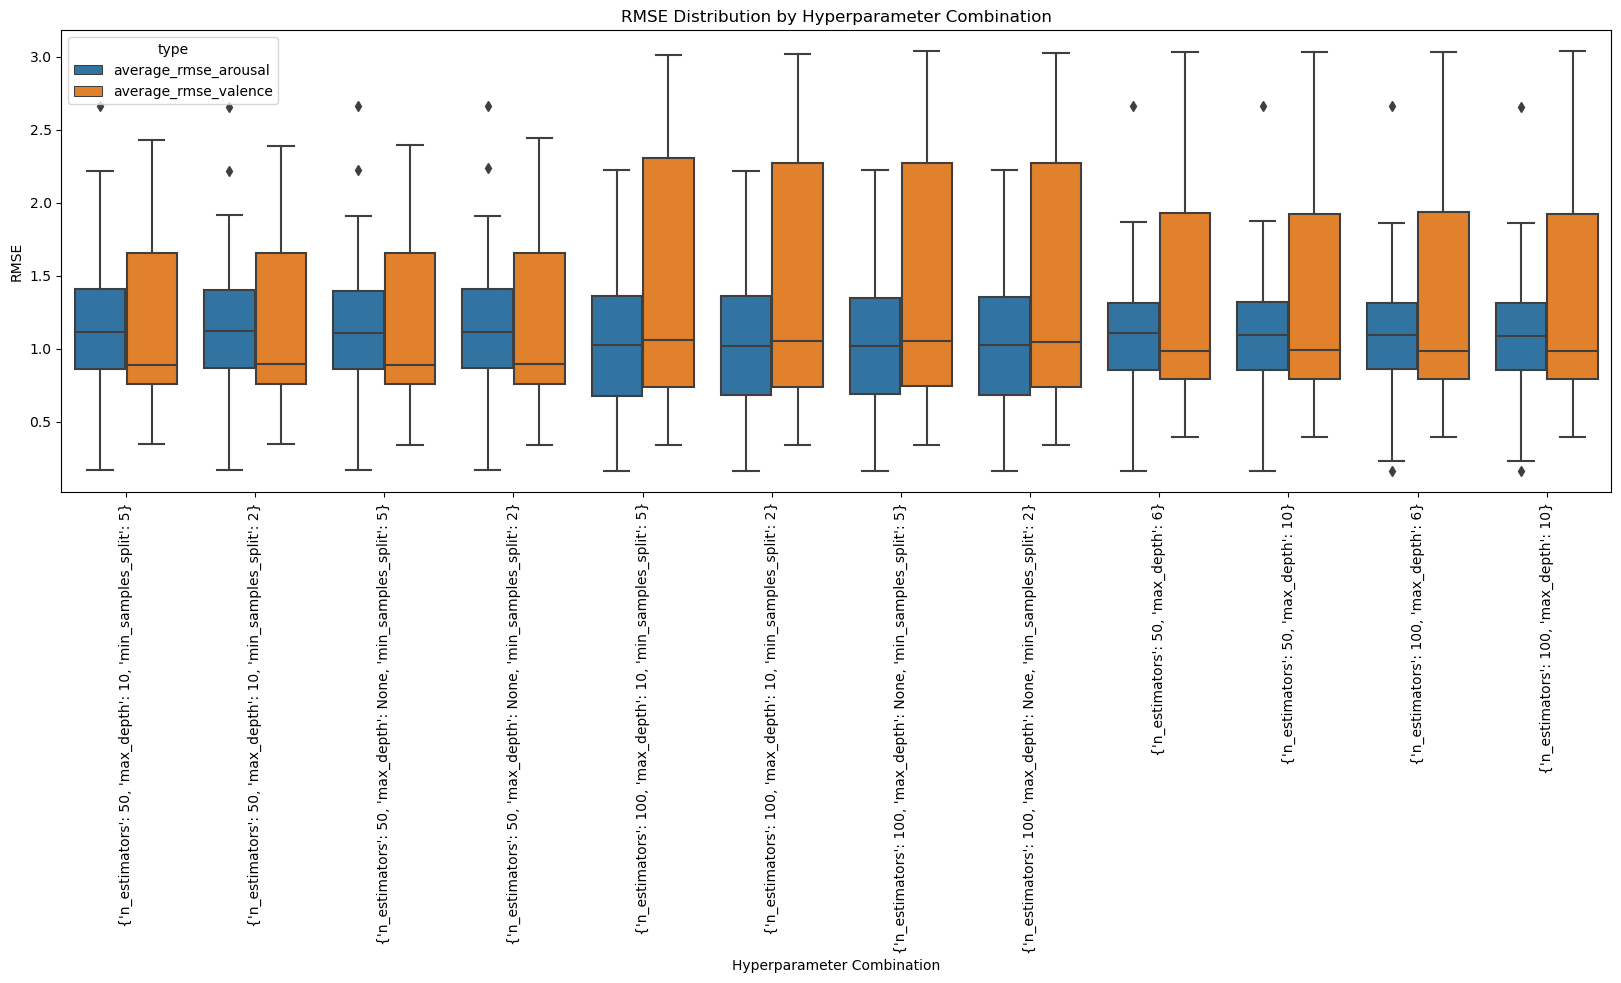

In [25]:
# Create a new column with a string representation of the hyperparameters dictionary
df_rmse['hyperparameters_str'] = df['hyperparameters'].apply(lambda x: str(x))

# Create a box plot for the RMSE distribution for each hyperparameter combination
plt.figure(figsize=(20, 6))
sns.boxplot(data=df_rmse, x='hyperparameters_str', y='rmse', hue='type')

# Set the title and labels
plt.title('RMSE Distribution by Hyperparameter Combination')
plt.xlabel('Hyperparameter Combination')
plt.ylabel('RMSE')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [26]:
# Group by hyperparameters and calculate aggregated statistics
hyperparameters_df = df_rmse.groupby('hyperparameters_str').describe()

# Group by aggregate methods and calculate aggregated statistics
aggregate_df = df_rmse.groupby('aggregate').describe()

# Sort the hyperparameters DataFrame by mean
hyperparameters_df_sorted = hyperparameters_df.sort_values(by=('rmse', 'mean'))

# Sort the aggregate methods DataFrame by mean
aggregate_df_sorted = aggregate_df.sort_values(by=('rmse', 'mean'))

# Display the sorted DataFrames
display(hyperparameters_df_sorted)
display(aggregate_df_sorted)



rmse                      \
                                                   count      mean       std   
hyperparameters_str                                                            
{'n_estimators': 100, 'max_depth': None, 'min_s...  57.0  1.167833  0.676927   
{'n_estimators': 100, 'max_depth': None, 'min_s...  57.0  1.168360  0.675765   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  57.0  1.168371  0.675123   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  57.0  1.169226  0.676824   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  57.0  1.174038  0.575434   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  57.0  1.175205  0.576457   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  57.0  1.175675  0.574244   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  57.0  1.176328  0.577852   
{'n_estimators': 50, 'max_depth': 10}               57.0  1.182541  0.617055   
{'n_estimators': 50, 'max_depth': 6}                57.0  1.183048  0.618728   
{'n_estimators': 100, 'max_depth': 10}              57.0  1.183837  0.619394   
{'n_estimators': 100, 'max_depth': 6}               57.0  1.183907  0.618783   

                                                                        \
                                                         min       25%   
hyperparameters_str                                                      
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.161877  0.693943   
{'n_estimators': 100, 'max_depth': None, 'min_s...  0.163903  0.686000   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.161119  0.684543   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  0.163260  0.682329   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.165286  0.804809   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.165907  0.814814   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  0.169126  0.811212   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  0.167336  0.806527   
{'n_estimators': 50, 'max_depth': 10}               0.163374  0.819234   
{'n_estimators': 50, 'max_depth': 6}                0.162920  0.819392   
{'n_estimators': 100, 'max_depth': 10}              0.164093  0.826473   
{'n_estimators': 100, 'max_depth': 6}               0.162287  0.823534   

                                                                        \
                                                         50%       75%   
hyperparameters_str                                                      
{'n_estimators': 100, 'max_depth': None, 'min_s...  1.054830  1.580109   
{'n_estimators': 100, 'max_depth': None, 'min_s...  1.046179  1.578247   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1.048248  1.569659   
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  1.056319  1.573586   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1.086821  1.569727   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1.085671  1.545684   
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  1.089602  1.586336   
{'n_estimators': 50, 'max_depth': None, 'min_sa...  1.085668  1.558491   
{'n_estimators': 50, 'max_depth': 10}               1.082452  1.377572   
{'n_estimators': 50, 'max_depth': 6}                1.090696  1.370097   
{'n_estimators': 100, 'max_depth': 10}              1.082806  1.382425   
{'n_estimators': 100, 'max_depth': 6}               1.080386  1.386462   

                                                              
                                                         max  
hyperparameters_str                                           
{'n_estimators': 100, 'max_depth': None, 'min_s...  3.035584  
{'n_estimators': 100, 'max_depth': None, 'min_s...  3.026062  
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  3.017864  
{'n_estimators': 100, 'max_depth': 10, 'min_sam...  3.010384  
{'n_estimators': 50, 'max_depth': None, 'min_sa...  2.658395  
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  2.663681  
{'n_estimators': 50, 'max_depth': 10, 'min_samp...  2.656705  

rmse                                                    \
                  count      mean       std       min       25%       50%   
aggregate                                                                   
min               464.0  1.229911  0.633776  0.161119  0.808832  1.106783   
mean,std,max,min  448.0  1.231929  0.634354  0.164166  0.770272  1.154553   

                                      
                       75%       max  
aggregate                             
min               1.656225  3.038181  
mean,std,max,min  1.646637  2.664241